In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)
from keras.models import Sequential
from keras.layers import LSTM,Dense
import keras

import matplotlib.pyplot as plt

## 变种LSTM模型结构的实现

RNN模型具有6种变形，其中Multiple Input变种非常适合用来进行时序预测。

## 全局参数说明

模型训练所需要设置的关键参数全部在这里，只需要改动这部分的参数就可以对模型进行调试。   

In [8]:
# 全局参数，所有要调整的参数都在这里
dim=300 #输出维度数
epochs=400 #训练代数（可以理解为训练次数）
days=20 #读取多少天的数据作为一次预测。例如读取20天的历史数据来预测未来1天的情况
batch_size = 535 #训练批次大小，就是一次性读取多少个样本进行一次运算，越大运算速度越快，但是占用内存和显存越大，根据自己的机器性能设置。

### Multiple Input 模型
### input为多个序列，output为一个序列的问题

x的取值为：
2个及两个以上的并行序列

In [9]:
n_steps = days
n_features = 5

In [10]:
# 并行序列模型
model_2 = Sequential()
model_2.add(LSTM(dim, activation='relu',input_shape=(n_steps, n_features)))
model_2.add(Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse')

## 这部分为数据处理   
step1：导入数据   
step2：生成训练序列训练集、测试集、标签   
step3：载入模型进行训练

In [11]:
data = pd.read_csv('600036.csv')

In [12]:
data.head()

,open,close,volume,turnover,return
0,17.93,17.71,746136,1332370048,-0.018837
1,17.71,17.73,914014,1615350016,0.001129
2,17.69,17.36,774277,1348702976,-0.020869
3,17.33,16.91,1019432,1742282240,-0.025922
4,16.88,16.91,803599,1351767296,0.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 5 columns):
open        2250 non-null float64
close       2250 non-null float64
volume      2250 non-null int64
turnover    2250 non-null int64
return      2250 non-null float64
dtypes: float64(3), int64(2)
memory usage: 88.0 KB


In [14]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        try:
            Y.append(data[(i+2+lb),0])
        except:
            Y.append(data[(i+lb),0])
        
    return np.array(X),np.array(Y)

def pData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
    return np.array(X)

In [15]:
from sklearn.preprocessing import MinMaxScaler
close = data['close']
cl = np.array(close)
cl = cl.reshape(cl.shape[0],1)
scl = MinMaxScaler()
sc2 = MinMaxScaler()
cl = scl.fit_transform(cl)

In [16]:
_,y = processData(cl,days)
X = data.values
X = sc2.fit_transform(X)
X = pData(X,days)

In [17]:
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]

In [429]:
# 生成tensorboard可视化的代码
#tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph',histogram_freq=1,write_graph=True, write_images=True)

### 开始执行训练

In [430]:
#Fit model with history to check for overfitting
history = model_2.fit(X_train,y_train,batch_size=batch_size, epochs=epochs,validation_data=(X_test,y_test),shuffle=False)

# 下面这个代码是边训练，边生成tensorboard的代码
#history = model_2.fit(X_train,y_train,batch_size=batch_size, epochs=epochs,validation_data=(X_test,y_test),shuffle=False, 
#                      callbacks = [tbCallBack])

Train on 1783 samples, validate on 446 samples
Epoch 1/400
1783/1783 [==============================] - 2s 1ms/step - loss: 0.0189 - val_loss: 0.2323
Epoch 2/400
1783/1783 [==============================] - 0s 99us/step - loss: 0.0284 - val_loss: 0.0298
Epoch 3/400
1783/1783 [==============================] - 0s 92us/step - loss: 0.0038 - val_loss: 0.0057
Epoch 4/400
1783/1783 [==============================] - 0s 96us/step - loss: 0.0028 - val_loss: 0.0023
Epoch 5/400
1783/1783 [==============================] - 0s 93us/step - loss: 0.0017 - val_loss: 0.0040
Epoch 6/400
1783/1783 [==============================] - 0s 92us/step - loss: 0.0011 - val_loss: 0.0110
Epoch 7/400
1783/1783 [==============================] - 0s 95us/step - loss: 0.0011 - val_loss: 0.0086
Epoch 8/400
1783/1783 [==============================] - 0s 101us/step - loss: 7.1175e-04 - val_loss: 0.0036
Epoch 9/400
1783/1783 [==============================] - 0s 99us/step - loss: 0.0018 - val_loss: 0.0941
Epoch 10/400


Epoch 77/400
1783/1783 [==============================] - 0s 99us/step - loss: 0.0010 - val_loss: 0.0017
Epoch 78/400
1783/1783 [==============================] - 0s 105us/step - loss: 3.6153e-04 - val_loss: 0.0019
Epoch 79/400
1783/1783 [==============================] - 0s 102us/step - loss: 4.1219e-04 - val_loss: 0.0115
Epoch 80/400
1783/1783 [==============================] - 0s 94us/step - loss: 6.2868e-04 - val_loss: 0.0015
Epoch 81/400
1783/1783 [==============================] - 0s 98us/step - loss: 4.2491e-04 - val_loss: 0.0104
Epoch 82/400
1783/1783 [==============================] - 0s 103us/step - loss: 6.3065e-04 - val_loss: 0.0062
Epoch 83/400
1783/1783 [==============================] - 0s 94us/step - loss: 8.4295e-04 - val_loss: 0.0347
Epoch 84/400
1783/1783 [==============================] - 0s 100us/step - loss: 9.3821e-04 - val_loss: 0.0064
Epoch 85/400
1783/1783 [==============================] - 0s 100us/step - loss: 0.0011 - val_loss: 0.0021
Epoch 86/400
1783/1783

1783/1783 [==============================] - 0s 92us/step - loss: 5.7629e-04 - val_loss: 0.0028
Epoch 226/400
1783/1783 [==============================] - 0s 89us/step - loss: 5.2733e-04 - val_loss: 0.0021
Epoch 227/400
1783/1783 [==============================] - 0s 90us/step - loss: 2.8696e-04 - val_loss: 0.0042
Epoch 228/400
1783/1783 [==============================] - 0s 96us/step - loss: 2.6782e-04 - val_loss: 0.0038
Epoch 229/400
1783/1783 [==============================] - 0s 98us/step - loss: 2.9078e-04 - val_loss: 0.0118
Epoch 230/400
1783/1783 [==============================] - 0s 92us/step - loss: 6.2059e-04 - val_loss: 0.0062
Epoch 231/400
1783/1783 [==============================] - 0s 92us/step - loss: 4.2885e-04 - val_loss: 0.0078
Epoch 232/400
1783/1783 [==============================] - 0s 94us/step - loss: 6.7122e-04 - val_loss: 0.0045
Epoch 233/400
1783/1783 [==============================] - 0s 99us/step - loss: 2.6997e-04 - val_loss: 0.0076
Epoch 234/400
1783/1783 

1783/1783 [==============================] - 0s 91us/step - loss: 4.0117e-04 - val_loss: 0.0149
Epoch 374/400
1783/1783 [==============================] - 0s 98us/step - loss: 2.8596e-04 - val_loss: 0.0145
Epoch 375/400
1783/1783 [==============================] - 0s 94us/step - loss: 2.6607e-04 - val_loss: 0.0032
Epoch 376/400
1783/1783 [==============================] - 0s 91us/step - loss: 4.0569e-04 - val_loss: 0.0038
Epoch 377/400
1783/1783 [==============================] - 0s 94us/step - loss: 2.7412e-04 - val_loss: 0.0082
Epoch 378/400
1783/1783 [==============================] - 0s 91us/step - loss: 4.0095e-04 - val_loss: 0.0032
Epoch 379/400
1783/1783 [==============================] - 0s 94us/step - loss: 3.1486e-04 - val_loss: 0.0097
Epoch 380/400
1783/1783 [==============================] - 0s 92us/step - loss: 2.6098e-04 - val_loss: 0.0345
Epoch 381/400
1783/1783 [==============================] - 0s 92us/step - loss: 3.2933e-04 - val_loss: 0.0104
Epoch 382/400
1783/1783 

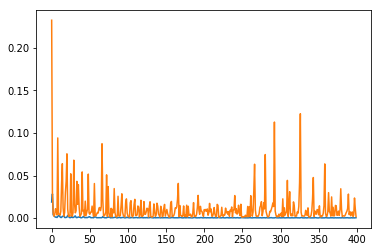

In [431]:
# 显示训练过程
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### 对训练模型进行效果评估
step1：单值预测检验   
step2：序列预测检验  
step3：用统计检验方法检验性能   

In [464]:
act = []
pred = []
import random
i=random.randint(0,250)
Xt = model_2.predict(X_test[i].reshape(1,days,5))
print('预测值:{0}, 实际值:{1}'.format(Xt,y_test[i].reshape(-1,1)))
pred.append(Xt)
act.append(y_test[i])

预测值:[[0.7393236]], 实际值:[[0.74340618]]


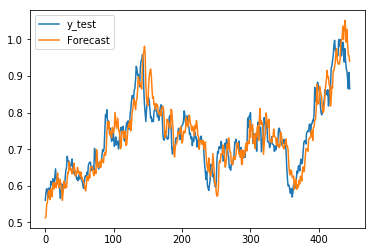

In [433]:
Xt = model_2.predict(X_test)
fig = plt.gcf()
plt.plot(y_test.reshape(-1,1),label='y_test')
plt.plot(Xt,label='Forecast')
plt.legend()

In [434]:
# 统计整体拟合的情况
a = y_test.reshape(-1,1)
b = Xt
c = a - b #实际值减去预测值
c = pd.DataFrame(c)
c.describe()

,0
count,446.000000
mean,-0.000310
std,0.043263
min,-0.159955
25%,-0.025397
50%,0.001764
75%,0.029904
max,0.119289


### 训练指标说明

mean：代表测试集验证后的结果与真实情况的差值序列的平均值，也就是整体差异水平。正负无所谓，越趋近0越好。   
std：标准差，代表均值在正负两个方向的分散程度，越小越好，说明结果比较集中，误差比较小

## 模型保存

如果你觉得上面的数值比较优秀，那么，请运行下面的代码，以便将模型保存在本地。方便进行交换或者用于竞赛。

In [435]:
path='my_model_2' # 请自行设置存储路径及文件名，例如：D:\\股票\\my_model
model_2.save(path+'.h5',include_optimizer=True) # 保存模型本体
model_2.save_weights(path + '_weights.h5') # 保存模型权重

### 模型载入执行预测
#### 说明：   
由于神经网络依靠随机数，未设置随机数种子，所以每次训练结果均不相同。所以将性能较好的模型进行存储。   
在实际使用时进行模型载入，分别查看预测结果。取最佳模型。

In [3]:
filepath = 'my_model_1'

In [4]:
my_model = keras.models.load_model(filepath+'.h5')

### 载入数据预测5月15日的close数值

In [21]:
p_1 = my_model.predict(X_test)
p_1 = scl.inverse_transform(p_1)
print('5月15日的close为：',p_1[-1])

5月15日的close为： [33.819942]


### 5月15日的close为： 33.82